# Loading the data and preliminary exploration
The notebook is a full analysis of the housing prices in California dataset,the ultimate goal is to predict housing prices in different districts based on demographic information for those districts,i will use the Pandas library to load it and do preliminary analysis.

## add Codeadd Markdown
Data Acquisition: we start by downloading the California housing data which includes of longitude, latitude, housing_median_age, total_rooms,total_bedrooms, population, households, median_income,median_house_value, ocean_proximity.
Data Preprocessing: Before proceeding with analysis or modeling, it is important to preprocess the data. This step involves addressing missing values and outliers present in the dataset.
Exploratory Data Analysis (EDA): Following the data preprocessing stage, it is essential to perform exploratory data analysis (EDA) to gain insights into the data's distribution, examine the relationships among different features, and how these future relate to The dependent variable is ln(median house value).
Model Building and Training: Once the exploratory data analysis (EDA) is complete, the next step is to separate the response variable (or label), in this case, the median house value, from the predictor variables. This allows me to focus on building a regression model to predict the median house value using the available features.
Model Evaluation: Finally, i will evaluate the performance of the model using the test set.
add Codeadd Markdown
## Domain Knowledge
In the context of the Carlifonia Housing dataset, it's important to understand the significance of the Housing features and the role they might play in predicting the Median house value. Let's delve deeper into these features:

longitude: A measure of how far west a house is; a higher value is farther west
Latitude: A measure of how far north a house is; a higher value is farther north
HousingMedianAge: Median age of a house within a block; a lower number is a newer building
totalRooms: Total number of rooms within a block
TotalBedrooms: Total number of bedrooms within a block
population: Total number of people residing within a block
Households: Total number of households, a group of people residing within a home unit, for a block
MedianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
MedianHouseValue: Median house value for households within a block (measured in US Dollars)
OceanProximity: Location of the house w.r.t ocean/sea

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
housing = pd.read_csv("kaggle/input/housing.csv")

In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
housing.loc[:,"latitude":"total_rooms"]

,latitude,housing_median_age,total_rooms
0,37.88,41.0,880.0
1,37.86,21.0,7099.0
2,37.85,52.0,1467.0
3,37.85,52.0,1274.0
4,37.85,52.0,1627.0
...,...,...,...
20635,39.48,25.0,1665.0
20636,39.49,18.0,697.0
20637,39.43,17.0,2254.0
20638,39.43,18.0,1860.0


In [6]:
housing[["latitude", "longitude"]]

,latitude,longitude
0,37.88,-122.23
1,37.86,-122.22
2,37.85,-122.24
3,37.85,-122.25
4,37.85,-122.25
...,...,...
20635,39.48,-121.09
20636,39.49,-121.21
20637,39.43,-121.22
20638,39.43,-121.32


In [7]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing["ocean_proximity"].describe()

count         20640
unique            5
top       <1H OCEAN
freq           9136
Name: ocean_proximity, dtype: object

In [9]:
 housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [12]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN


In [13]:
train_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.582290,35.643149,28.608285,2642.004784,538.496851,1426.453004,499.986919,3.880754,207194.693738
std,2.005654,2.136665,12.602499,2174.646744,419.007096,1137.056380,380.967964,1.904294,115622.626448
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.810000,33.930000,18.000000,1454.000000,296.750000,789.000000,280.000000,2.566700,119800.000000
50%,-118.510000,34.260000,29.000000,2129.000000,437.000000,1167.000000,410.000000,3.545800,179850.000000
75%,-118.010000,37.720000,37.000000,3160.000000,647.000000,1726.000000,606.000000,4.773175,265125.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [14]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,263300.0,<1H OCEAN
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,266800.0,NEAR OCEAN
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,500001.0,<1H OCEAN
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,72300.0,INLAND


In [15]:
test_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,4128.00000,4128.00000,4128.000000,4128.000000,3921.000000,4128.000000,4128.000000,4128.000000,4128.000000
mean,-119.51936,35.58671,28.764293,2610.796269,535.233104,1421.571705,497.750727,3.830338,205500.309593
std,1.99447,2.13276,12.518304,2209.359101,431.299704,1114.023136,387.770570,1.881515,114486.964288
min,-124.19000,32.54000,1.000000,6.000000,2.000000,8.000000,2.000000,0.499900,14999.000000
25%,-121.69000,33.93000,18.000000,1420.000000,294.000000,781.000000,278.000000,2.548500,119275.000000
50%,-118.47000,34.23000,29.000000,2110.000000,428.000000,1160.000000,406.000000,3.500000,178650.000000
75%,-117.99000,37.70000,37.000000,3099.250000,643.000000,1722.000000,598.000000,4.645925,263000.000000
max,-114.58000,41.81000,52.000000,37937.000000,5471.000000,16122.000000,5189.000000,15.000100,500001.000000


# Visualising data**


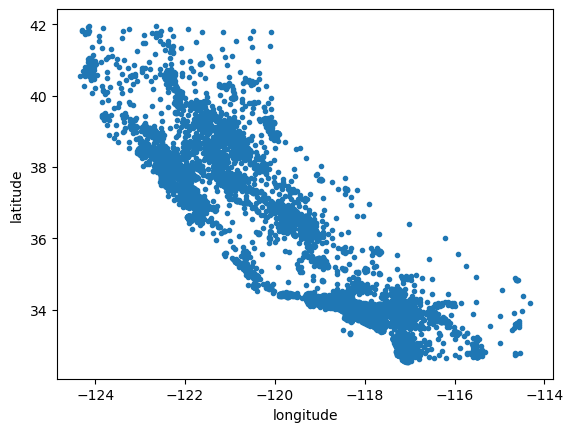

In [16]:
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.plot(housing["longitude"], housing["latitude"], ".")

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

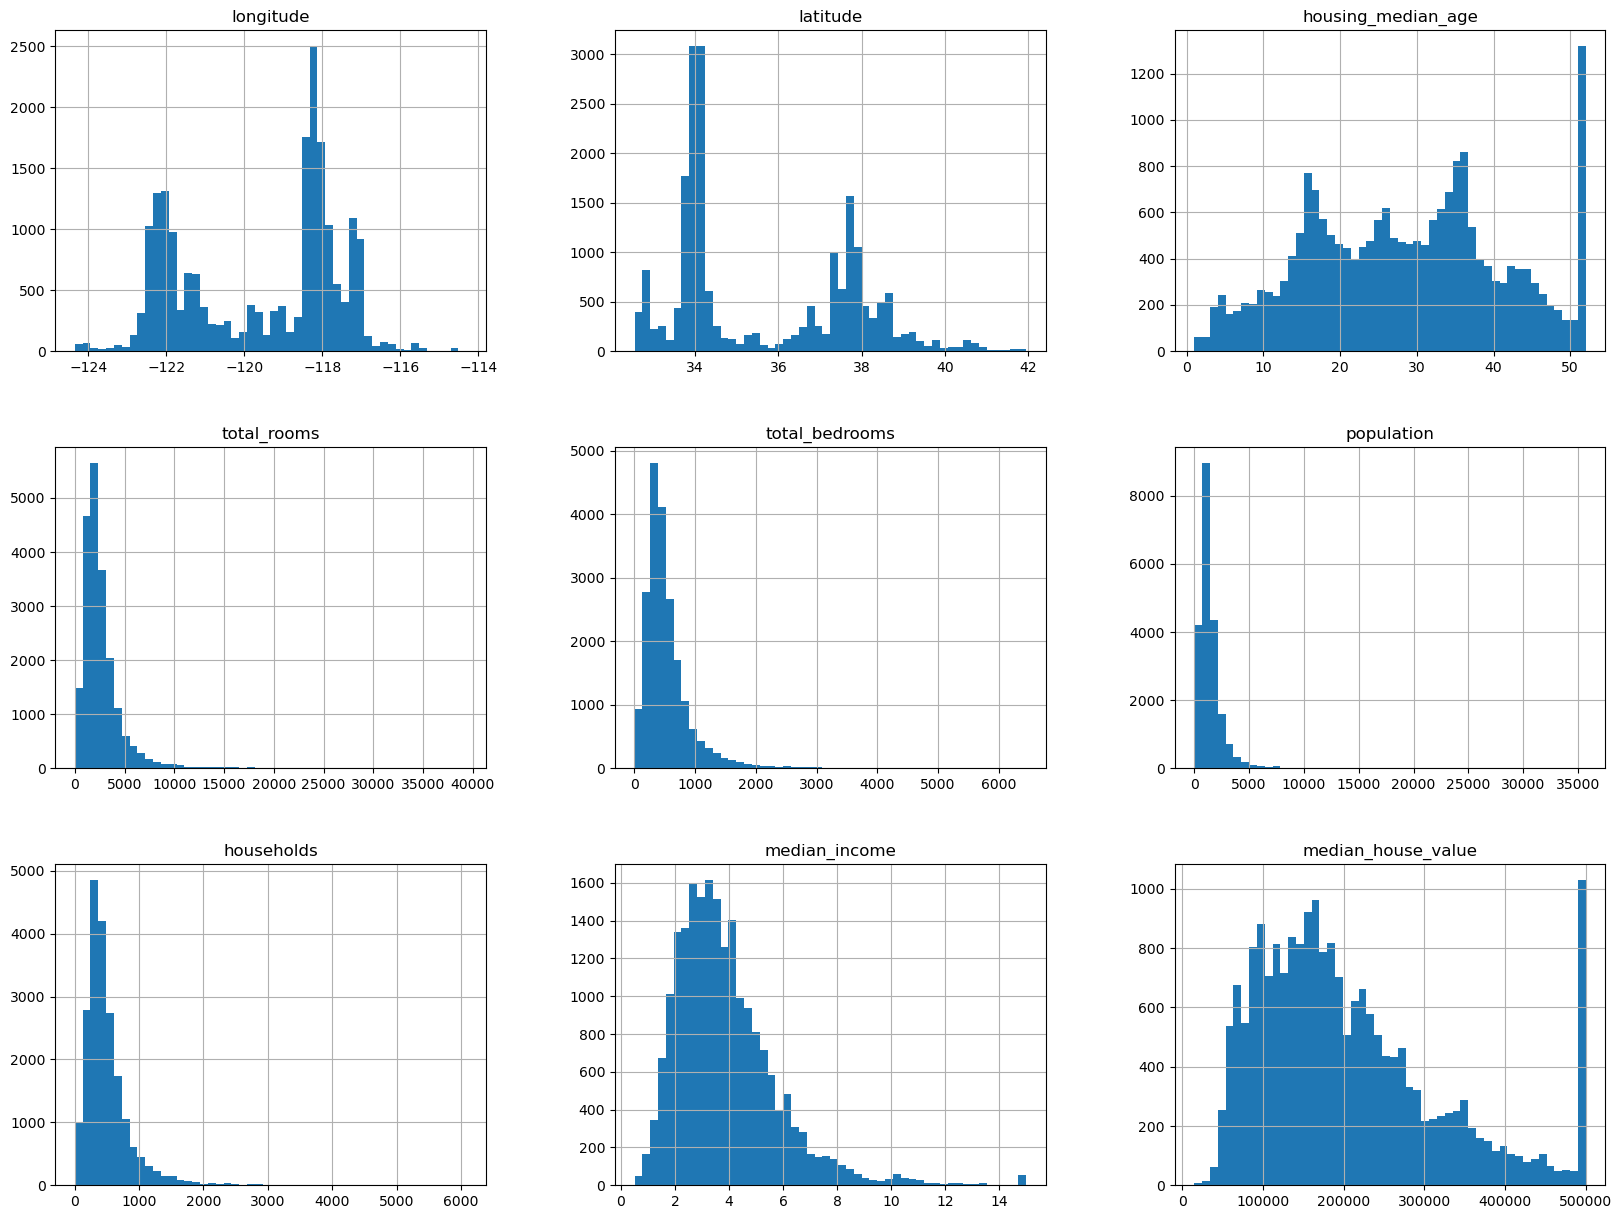

In [17]:
housing.hist(bins=50, figsize=(20,15))

# Correlations


In [18]:
corr_matrix = housing.corr()
corr_matrix

C:\Users\comp\AppData\Local\Temp\ipykernel_30508\1253314489.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


<Axes: >

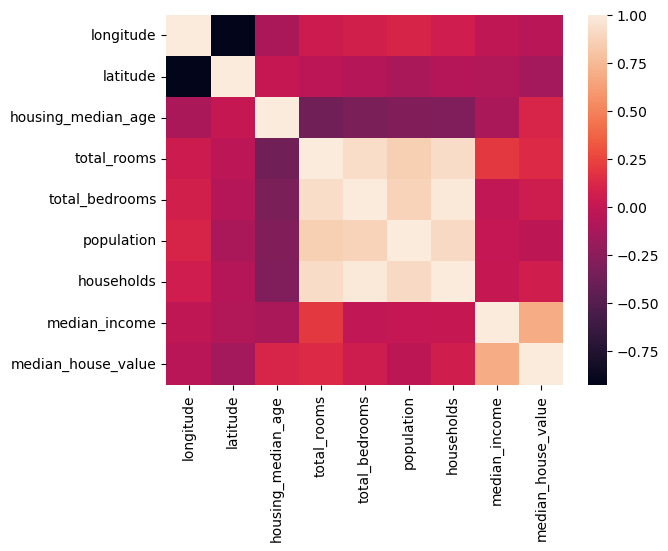

In [19]:
import seaborn as sns
sns.heatmap(corr_matrix)

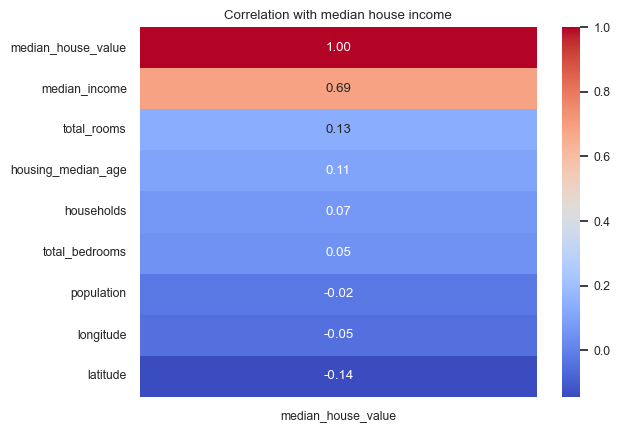

In [20]:
#Graph II
corr = corr_matrix
target_corr = corr['median_house_value'].drop('median_house_value')

# Sort correlation values in descending order
target_corr_sorted = corr_matrix["median_house_value"].sort_values(ascending=False)

# Create a heatmap of the correlations with the target column
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with median house income')
plt.show()

In [21]:
housing.total_rooms

0         880.0
1        7099.0
2        1467.0
3        1274.0
4        1627.0
          ...  
20635    1665.0
20636     697.0
20637    2254.0
20638    1860.0
20639    2785.0
Name: total_rooms, Length: 20640, dtype: float64

Adding Columns

In [23]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [24]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209


In [25]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,0.213039,3.070655
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.057983,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.175427,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.203162,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.239821,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


C:\Users\comp\AppData\Local\Temp\ipykernel_30508\2496074049.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


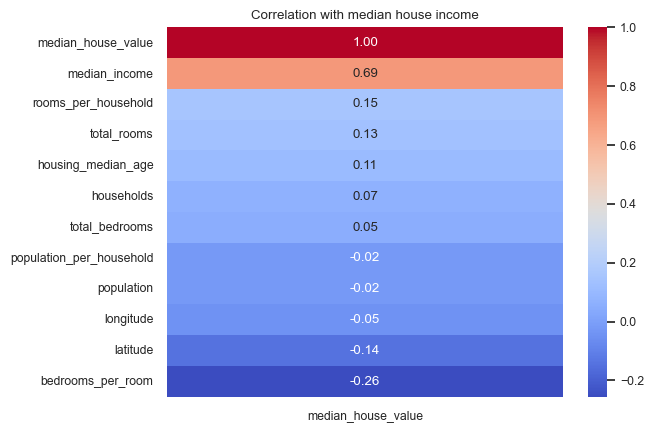

In [26]:
#Graph II
import seaborn as sns

corr_matrix = housing.corr()
corr_matrix
corr = corr_matrix
target_corr = corr['median_house_value'].drop('median_house_value')

# Sort correlation values in descending order
target_corr_sorted = corr_matrix["median_house_value"].sort_values(ascending=False)

# Create a heatmap of the correlations with the target column
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with median house income')
plt.show()

## Preparing the data for ML

CEATING TEST DATA

I proceed by spliting the dataset into a training set and a test set by splitting Randomly so as to avoid any accidental bias.i decide to go with The test_size=0.2 inside the function indicates the percentage of the data that should be held over for testing. It's usually around 80/20 or 70/30.

In [27]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [29]:
new_housing = train_set.drop("median_house_value", axis=1)
housing_labels = train_set["median_house_value"].copy()
housing_labels

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
           ...   
11284    229200.0
11964     97800.0
5390     222100.0
860      283500.0
15795    325000.0
Name: median_house_value, Length: 16512, dtype: float64

In [30]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = new_housing.drop("ocean_proximity", axis=1)

In [31]:
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,5.017657,0.200576,3.691814
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,4.473545,0.232703,1.738095
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,5.645833,0.174486,2.723214
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,4.002817,0.258269,3.994366
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,6.268421,0.180940,2.300000
...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,6.129032,0.151128,3.032258
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,6.868597,0.184825,3.904232
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,3.986717,0.270823,3.332068
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,6.395349,0.166993,3.178891


In [32]:
X = imputer.fit_transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)


In [33]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,5.017657,0.200576,3.691814
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,4.473545,0.232703,1.738095
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,5.645833,0.174486,2.723214
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,4.002817,0.258269,3.994366
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,6.268421,0.180940,2.300000
...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,6.129032,0.151128,3.032258
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,6.868597,0.184825,3.904232
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,3.986717,0.270823,3.332068
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,6.395349,0.166993,3.178891


In [34]:
housing_tr.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.582290,35.643149,28.608285,2642.004784,538.496851,1426.453004,499.986919,3.880754,5.435235,0.212858,3.096961
std,2.005654,2.136665,12.602499,2174.646744,419.007096,1137.056380,380.967964,1.904294,2.387375,0.057995,11.578744
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.888889,0.100000,0.692308
25%,-121.810000,33.930000,18.000000,1454.000000,296.750000,789.000000,280.000000,2.566700,4.452055,0.175178,2.428799
50%,-118.510000,34.260000,29.000000,2129.000000,437.000000,1167.000000,410.000000,3.545800,5.235874,0.202808,2.817240
75%,-118.010000,37.720000,37.000000,3160.000000,647.000000,1726.000000,606.000000,4.773175,6.061037,0.239501,3.280000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,141.909091,1.000000,1243.333333


# Fitting a model

## Linear regression
we use linear regression to predict the median house price. We have to import functionality from the SKLearn library,Fitting a linear regression model to the training data.

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [37]:
lin_reg = LinearRegression()
lin_reg.fit(housing_tr, housing_labels)

LinearRegression()

In [38]:
import statsmodels.api as sm

# Add a constant term to the independent variables
w = sm.add_constant(housing_tr)

# Create an OLS (Ordinary Least Squares) model
ols_model = sm.OLS(housing_labels, w)

# Fit the OLS model
ols_results = ols_model.fit()

# Print the model summary
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     2797.
Date:                Fri, 06 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:00:26   Log-Likelihood:            -2.0724e+05
No. Observations:               16512   AIC:                         4.145e+05
Df Residuals:                   16500   BIC:                         4.146e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [39]:
lin_reg.coef_

array([-4.16602477e+04, -4.11776632e+04,  1.18740813e+03,  1.96363588e+00,
        1.42552145e+01, -4.11842109e+01,  1.09082165e+02,  4.26351077e+04,
        3.51054107e+03,  3.25340711e+05,  5.72389928e+01])

In [40]:
some_data = housing_tr[:5]
some_labels = housing_labels[:5]

print("predictions:", lin_reg.predict(some_data))
print("data:       ", list(some_labels))

predictions: [174604.09900923 286932.59962485 254594.00384703 141428.66120013
 172734.0209552 ]
data:        [103000.0, 382100.0, 172600.0, 93400.0, 96500.0]


We then proceed to compare the predictions over all the training set to the actual values of the median house value, and compute the root mean square error as a provisional measure of the accuracy of the prediction.

calculating the mean squared error (MSE) between the actual median house values (housing_labels) and the predicted values (housing_predictions). The MSE is a measure of the average squared difference between the predicted and actual values.

Notice that we are not yet looking at the test data.We are just doing some rough validation using the training set.

In [41]:
housing_predictions = lin_reg.predict(housing_tr)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68311.8562967575